In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = untar_data(URLs.YELP_REVIEWS)

In [4]:
path

PosixPath('/root/.fastai/data/yelp_review_full_csv')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/yelp_review_full_csv/data_clas.pkl'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/train.csv'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/test.csv'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/readme.txt'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/data_lm.pkl'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/models')]

In [6]:
def display_head(file):
    df = pd.read_csv(path/file, header=None)
    print(df.head())

In [7]:
display_head('train.csv')

   0                                                  1
0  5  dr. goldberg offers everything i look for in a...
1  2  Unfortunately, the frustration of being Dr. Go...
2  4  Been going to Dr. Goldberg for over 10 years. ...
3  4  Got a letter in the mail last week that said D...
4  1  I don't know what Dr. Goldberg was like before...


In [8]:
display_head('test.csv')

   0                                                  1
0  1  I got 'new' tires from them and within two wee...
1  1  Don't waste your time.  We had two different p...
2  1  All I can say is the worst! We were the only 2...
3  1  I have been to this restaurant twice and was d...
4  1  Food was NOT GOOD at all! My husband & I ate h...


In [9]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.7.3
fastai        : 1.0.54
fastprogress  : 0.1.21
torch         : 1.0.0
nvidia driver : 410.72
torch cuda    : 10.0.130 / is available
torch cudnn   : 7401 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 7611MB | Tesla P4

=== Environment === 
platform      : Linux-4.9.0-8-amd64-x86_64-with-debian-9.7
distro        : #1 SMP Debian 4.9.130-2 (2018-10-27)
conda env     : base
python        : /opt/anaconda3/bin/python
sys.path      : /opt/deeplearning/workspace/tutorials/fastai/course-v3/nbs_gil
/opt/anaconda3/lib/python37.zip
/opt/anaconda3/lib/python3.7
/opt/anaconda3/lib/python3.7/lib-dynload

/opt/anaconda3/lib/python3.7/site-packages
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be 

In [10]:
data = TextClasDataBunch.from_csv(path, 'train.csv')
data.show_batch()

text,target
"xxbos xxup wed , xxup march 27 , 2013 / / xxup xxunk \n xxup price xxup for 2 : $ xxunk ( xxup tr price ) + $ xxunk ( tax ) + $ xxunk ( tip ) = $ 80.00 \n xxup wait : 15 - 20mins \n xxup server : xxup dawn - ( 4 / 5 ) . xxmaj she looked frazzled but",5
"xxbos xxmaj honestly , i love supporting small businesses whenever they open in our city of xxmaj las xxmaj vegas , but if you do please come with your game correct ! xxmaj wing xxmaj heaven was just a letdown . \n \n xxmaj the concept is great , wings , fish , other fried delights . xxmaj but where xxmaj wing xxmaj heaven fails is in the execution",2
xxbos xxmaj let me start by saying i was n't going to write a review after what i thought was a resolved incident . i decided to book a room for saturday night to catch some sleep before checking into xxup mgm on sunday and monday night . i booked a night for saturday and found the price to be reasonable . i checked in at 8 pm and told,1
"xxbos i have been coming to xxmaj studio b since it first opened . xxmaj even when i moved away to xxmaj california in 2010 , i would come to xxmaj studio b at least xxup once if i visited xxmaj las xxmaj vegas . \n \n xxmaj like many have mentioned , xxmaj studio b includes alcoholic beverages in their buffet . xxmaj they give you the choice",2
"xxbos i hate to be the first to review this with such a negative rating , unfortunately opening day did not do the place justice . i understand that opening on a xxmaj friday night has its perks - lots of business , great way to show your nightlife capabilities - and show off in general , fresh crowds and new people to bring in and form into regulars ,",2


In [4]:
bs=48

In [10]:
bs=24 # For later training sessions only

In [5]:
bs=12

In [12]:
data = TextList.from_csv(path, 'train.csv', cols=1).split_by_rand_pct(0.1).label_for_lm().databunch(bs=bs)

In [13]:
data.show_batch()

idx,text
0,"or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj"
1,made me sick . xxmaj did i mention that ? i do n't totally blame xxmaj baja though . xxmaj chipotle did its part in pissing me off for the whole trip . xxmaj baja unfortunately just fell out of my butt hours later . xxbos xxmaj this is the second xxmaj baja xxmaj fresh location i 've been to . xxmaj like all the others places i visited in
2,"here or pick up a to - go order and eat it in whatever environment you choose ! xxbos xxmaj since moving back to xxmaj arizona from xxmaj california 5 years ago , we 've tried out many xxmaj chinese food restaurants in the valley . xxmaj this is one of the best that we 've found so far . \n \n xxmaj the decor is a bit tired"
3,"and literally hours before items were delivered . xxmaj the room itself is as far away as is possible to be from the conference rooms , and actually , quite tired and dark . i requested a move to a better room , but was flatly refused . xxmaj parking is a nightmare . xxmaj wo n't stay here again , and will hope to be able to convince my"
4,"1.5 hours later the delivery man showed up . ( i called at the 55 min mark and was assured that the driver was on his way ) . xxmaj well 40 min after that when he did show up , he brought 1 tiny container of xxmaj lasagna ( enough for a child 's portion ) and our xxmaj garlic bread . xxmaj now starving and super disappointed ,"


In [14]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the',
 ',',
 'and',
 'i',
 'a',
 'to',
 'was',
 'it',
 'of',
 'for']

In [15]:
data.train_ds[0][0]

Text xxbos xxmaj unfortunately , the frustration of being xxmaj dr. xxmaj goldberg 's patient is a repeat of the experience i 've had with so many other doctors in xxup nyc -- good doctor , terrible staff . xxmaj it seems that his staff simply never answers the phone . xxmaj it usually takes 2 hours of repeated calling to get an answer . xxmaj who has time for that or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj dr. xxmaj goldberg 2 stars .

In [16]:
data.train_ds[0][0].data[:10]

array([   2,    5,  637,   11,   10, 4512,   18,  196,    5, 1367])

In [17]:
data_lm = data

In [18]:
data_lm.save('data_lm.pkl')

In [8]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [9]:
data_lm.show_batch()

idx,text
0,"or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj"
1,made me sick . xxmaj did i mention that ? i do n't totally blame xxmaj baja though . xxmaj chipotle did its part in pissing me off for the whole trip . xxmaj baja unfortunately just fell out of my butt hours later . xxbos xxmaj this is the second xxmaj baja xxmaj fresh location i 've been to . xxmaj like all the others places i visited in
2,"here or pick up a to - go order and eat it in whatever environment you choose ! xxbos xxmaj since moving back to xxmaj arizona from xxmaj california 5 years ago , we 've tried out many xxmaj chinese food restaurants in the valley . xxmaj this is one of the best that we 've found so far . \n \n xxmaj the decor is a bit tired"
3,"and literally hours before items were delivered . xxmaj the room itself is as far away as is possible to be from the conference rooms , and actually , quite tired and dark . i requested a move to a better room , but was flatly refused . xxmaj parking is a nightmare . xxmaj wo n't stay here again , and will hope to be able to convince my"
4,"1.5 hours later the delivery man showed up . ( i called at the 55 min mark and was assured that the driver was on his way ) . xxmaj well 40 min after that when he did show up , he brought 1 tiny container of xxmaj lasagna ( enough for a child 's portion ) and our xxmaj garlic bread . xxmaj now starving and super disappointed ,"


In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


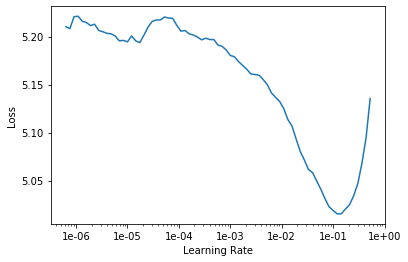

In [23]:
learn.recorder.plot(skip_end=15)

In [24]:
learn.fit_one_cycle(1, 0.05, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.022524,3.894637,0.284670,3:09:49


In [25]:
learn.save('fit_head')

In [11]:
learn.load('fit_head');

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.727931,3.664056,0.313134,3:33:54
1,3.475474,3.381761,0.344824,3:33:58


In [14]:
learn.save('fine_tuned')

In [12]:
learn.load('fine_tuned');

In [13]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [14]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it is a small park . It 's hard to see the movie theater being a big disappointment . The theater itself is very large and has a large seating area . i liked the way they upgraded
I liked this movie because the place was busy & crowded . But the last time i went , there was no line to get in . It was just a little more than a couple of people waiting to be seated and


In [ ]:
learn.save_encoder('fine_tuned_enc')

In [7]:
data_clas = TextList.from_csv(path, 'train.csv', cols=1).split_by_rand_pct(0.1).label_from_df(cols=0).databunch(bs=bs)

In [17]:
data_clas.save('data_clas.pkl')

In [8]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [6]:
data_clas.show_batch()

text,target
"xxbos xxup wed , xxup march 27 , 2013 / / xxup xxunk \n xxup price xxup for 2 : $ xxunk ( xxup tr price ) + $ xxunk ( tax ) + $ xxunk ( tip ) = $ 80.00 \n xxup wait : 15 - 20mins \n xxup server : xxup dawn - ( 4 / 5 ) . xxmaj she looked frazzled but",5
"xxbos xxmaj get to mccarran , and i realize , i do n't want to walk all over the strip for 5 days , especially if we want to take a jaunt outside of vegas proper . xxmaj whip out my iphone , and check hotwire - 234 - 275 $ for a xxmaj standard xxmaj class , 222 - 259 for a xxmaj compact or xxmaj economy . i",1
xxbos i visited this place on 7 / 27 after finder them on spafinder . xxmaj my xxmaj fiance & i had received a couple of xxmaj gift xxmaj cards for our recent engagement and decided we could use a xxmaj massage . i went on xxunk website to finder a merchant who accept their spafinder xxmaj gift xxmaj cards and i stumbled across xxunk xxmaj for xxmaj you .,1
"xxbos xxmaj las xxmaj vegas can be on the extremes at times with all of its glamour and luxury along with the back alley dirt on your dinner table ; however , i 've never been offended by xxmaj vegas until now . \n \n xxup haze may be the newest nightclub in town , but it sure wo n't last very long when the mystery is revealed that",1
xxbos xxmaj stopped into xxmaj total xxmaj wine again for what is now the third time . xxmaj my first time was just after it opened and the store was a bit chaotic and i found that the employees seemed a bit pretentious . i was unimpressed so it was quite a while before i went back again . \n \n xxmaj my second trip in was about a,2


In [9]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


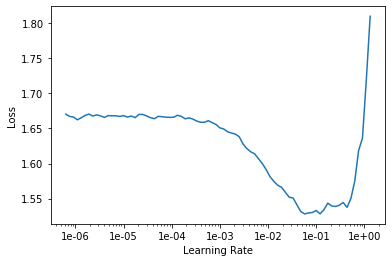

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(1, 0.04, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.191114,1.098047,0.530008,48:12


In [25]:
learn.save('first')

In [26]:
learn.load('first');

In [27]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.893896,0.809959,0.649656,1:06:08


In [28]:
learn.save('second')

In [8]:
learn.load('second');

In [9]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.895230,0.810422,0.654164,1:46:14


In [10]:
learn.save('third')

In [10]:
learn.load('third');

In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.891890,0.794943,0.658026,4:39:20
1,0.833947,0.778679,0.664303,4:37:55


In [12]:
learn.save('fully_trained')

In [15]:
learn.predict("I really loved that movie, it was awesome, excellent! This was the best movie ever")

(Category 5,
 tensor(4),
 tensor([5.0104e-04, 5.3109e-03, 1.0084e-02, 2.6087e-01, 7.2323e-01]))